In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Plotting

In [9]:
path = 'AdrewNg ML practice/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<function matplotlib.pyplot.show(close=None, block=None)>

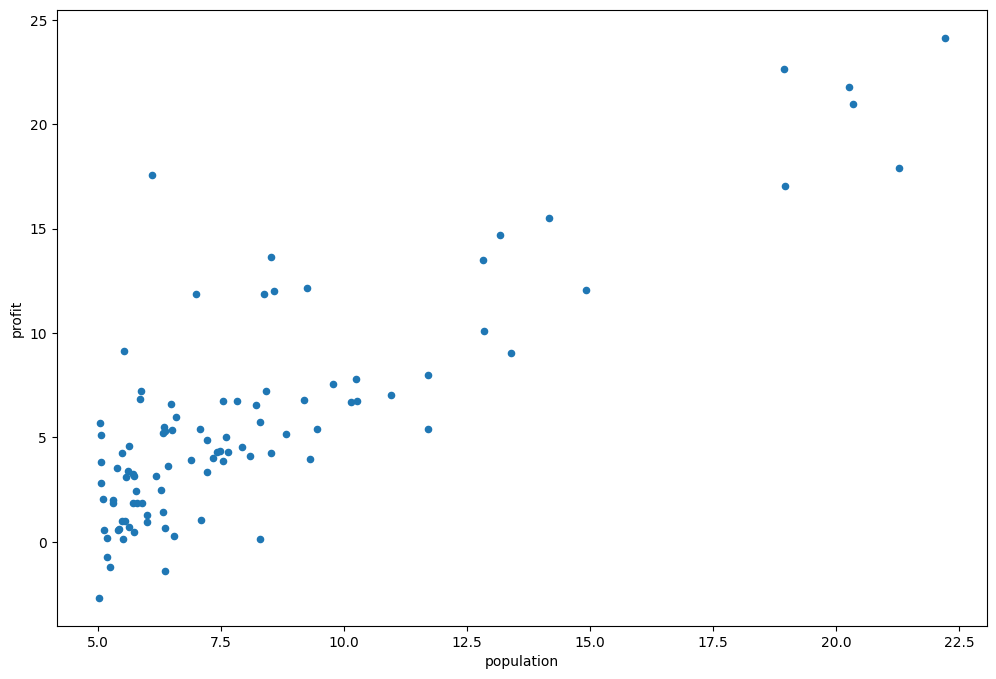

In [10]:
data.plot(kind='scatter', x='population', y='profit', figsize=(12,8))
plt.show

## Cost Function

In [11]:
def costFunc(x,y,theta):
    inner = np.power((x * theta - y), 2)
    return np.sum(inner) / (2*len(x))

#### 加入一列值全为1的x_0

In [12]:
data.insert(0,'x_0',1)

In [13]:
data.head()

,x_0,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [14]:
x = data.loc[:,'x_0':'population'] #x取前两列
x.head()

,x_0,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y = data.loc[:,'profit'] #y取最后一列
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

#### 将x，y转换成numpy matrices + 初始化theta

In [16]:
x = np.matrix(x.values)
y = np.matrix(y.values).T
x.shape, y.shape

((97, 2), (97, 1))

In [17]:
theta = np.matrix(np.zeros((2,1)))
theta.shape

(2, 1)

### 计算cost function J($\theta$)

In [18]:
cf = costFunc(x,y,theta)
print(cf)

32.072733877455676


## Gradient Descent

In [19]:
def gradientDescent(x, y, theta, alpha, iters):
    cost = []
    for i in range(iters):
        term = (x @ theta - y)
        delta = (1/len(x)) * (x.T @ term)
        theta = theta - alpha*delta
        cost.append(costFunc(x,y,theta))
    return theta, cost

In [20]:
alpha = 0.01
iters = 1500

In [21]:
t, cost = gradientDescent(x, y, theta, alpha, iters)
t

matrix([[-3.63029144],
        [ 1.16636235]])

In [32]:
predict1 = [1, 3.5] * t
predict2 = [1, 7] * t

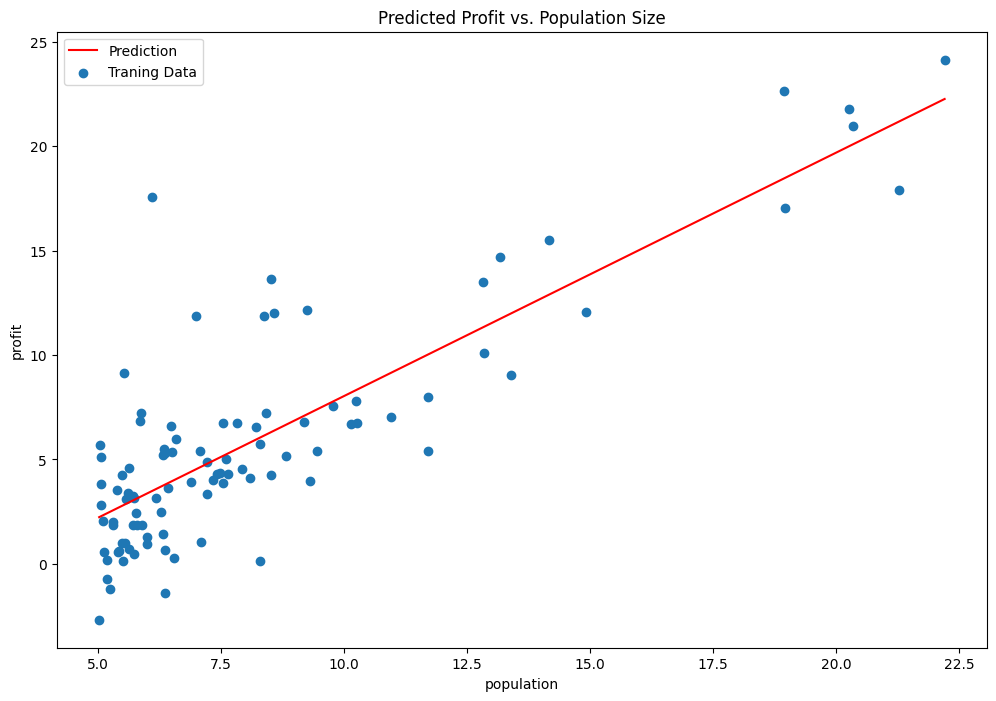

In [33]:
x = np.linspace(data.population.min(), data.population.max(), 100)
f = t[0, 0] + (t[1, 0] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## Normal Equation 正规方程

In [22]:
def normalEqn(x,y):
    theta = np.linalg.inv(x.T @ x) @ x.T @ y
    return theta

In [23]:
X = data.loc[:,'population']
X = np.matrix(X.values).T
X.shape

(97, 1)

In [24]:
normalTheta = normalEqn(X,y)
print(normalTheta)

[[0.80252685]]


In [25]:
normalTheta = normalEqn(x,y)
print(normalTheta)

[[-3.89578088]
 [ 1.19303364]]
